# <center>The Exploration of A Data Set: What Effects the Movie Rating?</center>

## As the project requests, here's a data set from TMDb, a website which collects data for imnumerous movies, including budget and revenue of movies, rating, etc.. Our object is to find out the factors that affect the movie rating.

## To be simple, I put the conclusions at the beginning of this report as below:

   ### 0. The data set provides a table containing more than 10,000 movies information. We use `vote_average` as dependent variable, meanwhile use `release year`, `vote count` and `genres` as independent variables, and try to find out relationships among these factors.

   ### 1. There is a positive correlation between `vote average` and `vote count`. This means a movie would get higher rating, if audience voted more for it.

   ### 2. There is a negative correlation between `vote average` and `release year`. This means in audience's mind, those *old fashion* movies are more welcome. Meanwhile *bad movies* are generated more since 1990.

   ### 3. Based on the data, `Documentary`, `Music` ,`History`, `Animation` and `War` the movies are most welcome. And `Horror`, `Science Fiction` (a little suprise), `Thriller`, `Action` and `TV Movie` movie get lower rating.
   
## The progress of data analysis are attached in the rest of this report

____________

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df_raw = pd.read_csv('tmdb_movies.csv')
df_raw.head(2)
#A quick review of data structure

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
df_raw.info()
#A quick review of data structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Explore the relationship among `vote_average`(rating), `release_year`(released year), `vote_count`(vote count) and `genres`(class of the movie). Notice that the `genres` contains NaN values, so firstly, we took out those useful columns and deleted those rows containing NaN. 

In [4]:
df = df_raw[['vote_average','vote_count','release_year','genres']].copy()
df.dropna(subset=['genres'],inplace=True)
df.head(2)

,vote_average,vote_count,release_year,genres
0,6.5,5562,2015,Action|Adventure|Science Fiction|Thriller
1,7.1,6185,2015,Action|Adventure|Science Fiction|Thriller


In [5]:
df.describe()

,vote_average,vote_count,release_year
count,10843.000000,10843.000000,10843.000000
mean,5.973974,217.813705,2001.315595
std,0.934260,576.155351,12.813298
min,1.500000,10.000000,1960.000000
25%,5.400000,17.000000,1995.000000
50%,6.000000,38.000000,2006.000000
75%,6.600000,146.000000,2011.000000
max,9.200000,9767.000000,2015.000000


If we use "year" to make bar chart directly, the ticks of the chart will be very narrow because of too many year numbers. So I checked some popular parameters of the data set as above, and use them to slice the data set.

Here I classified movies into four kinds: "before 90s", "90s", "00s", "10-15". And did similar things for "rating".

In [6]:
df['rating'] = pd.cut(df['vote_average'],[1.5,5.4,6.0,6.6,9.2],labels=['bad','fair','good','very good'])
df['years'] = pd.cut(df['release_year'],[1960,1990,2000,2010,2015],labels=['before 90s','90s','00s','10 - 15'])
df.head(2)

,vote_average,vote_count,release_year,genres,rating,years
0,6.5,5562,2015,Action|Adventure|Science Fiction|Thriller,good,10 - 15
1,7.1,6185,2015,Action|Adventure|Science Fiction|Thriller,very good,10 - 15


#### Firstly we explored the relationship between `vote_average` and `vote_count`:

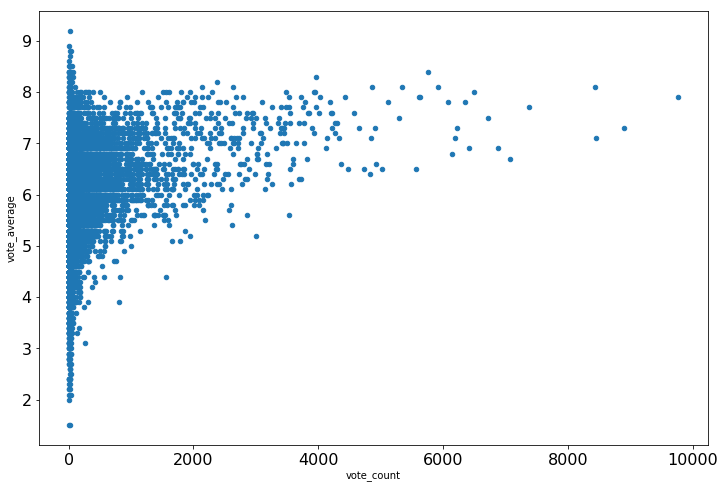

In [7]:
df.plot(x='vote_count',y='vote_average',kind='scatter',figsize=(12,8),fontsize=16);

The relationship is not obvious. Let's change the x-axis to a *log*-x-axis.

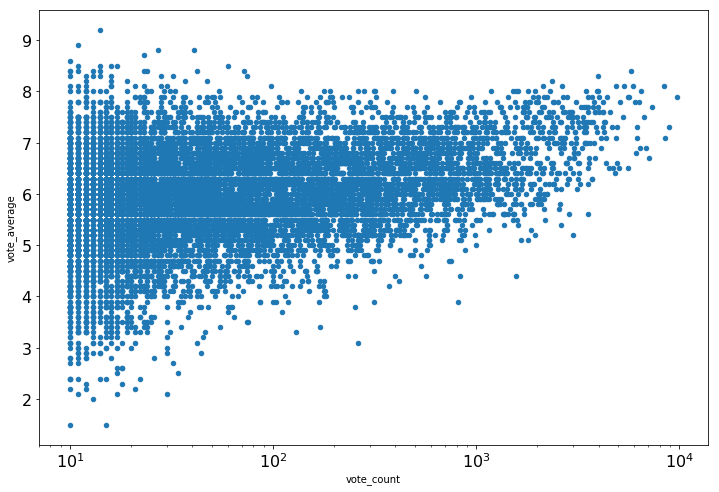

In [8]:
df.plot(x='vote_count',y='vote_average',logx=True,kind='scatter',figsize=(12,8),fontsize=16);

The relationship is more clearer right now: **it's positive**. Generally, more people vote for a movie, a higher score that the movie would get.
(Notice that while the vote count is small, the rating could be very variable. Thus statistic knowledge need to be considered in the future.)

-----------

#### Next, we explore the relationship between "rating" and "year".


In [27]:
df_RY = df.groupby(['years','rating']).count().unstack()
df_RY_percent = df_RY['vote_average'].copy()
sumList = df_RY_percent.sum(axis=1)
for i,j in zip(df_RY_percent.index,sumList):
    df_RY_percent.loc[i,:] = df_RY_percent.loc[i,:]/j*100
df_RY_percent
# I used "groupby" and other funtions to get the sum as well as the count of the rating score. 
#Then used a simple algorithm to normalize the average value.

rating,bad,fair,good,very good
years,,,,
before 90s,16.461311,24.691966,29.571217,29.275505
90s,26.171244,24.071082,27.571352,22.186322
00s,27.901493,25.884202,24.993450,21.220854
10 - 15,31.970380,22.987766,21.281391,23.760464


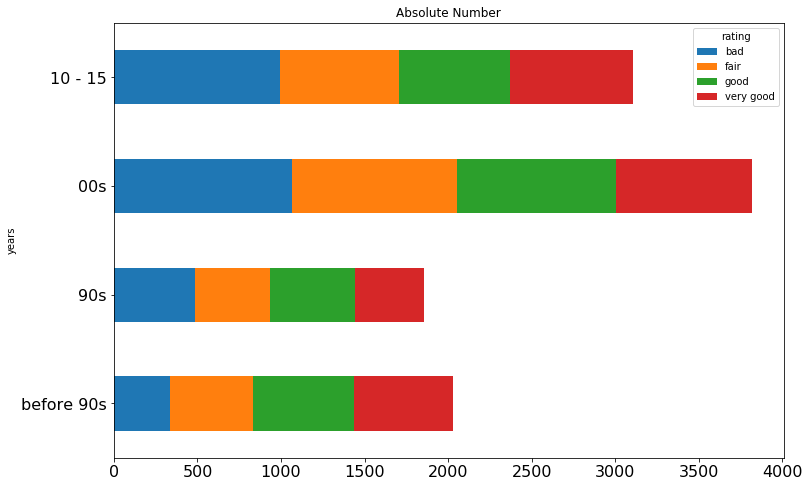

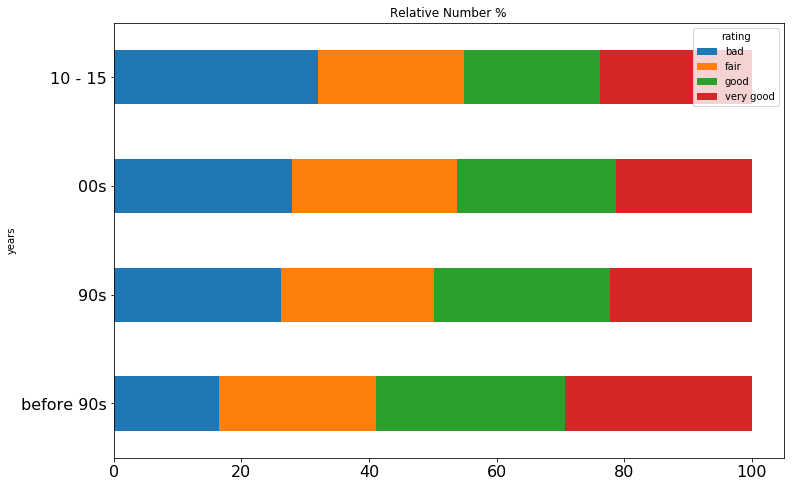

In [28]:
df_RY['vote_average'].plot.barh(stacked=True,figsize=(12,8),fontsize=16,title='Absolute Number');
df_RY_percent.plot.barh(stacked=True,figsize=(12,8),fontsize=16,title='Relative Number %');

Here're two charts: and the second one is already normalized. Notice that the amount is 100% for each era.

After the normalization, the conclusion is clear: **when the time past, the portion of "bad movie" rised**, although "very good movie" rised as well, the portion of "very good movie" still has gap with *old fashion* movies which were released before 1990.

---

#### Finally, we explored the affection of movie class that whether a specific movie class ("Adventure", "History", etc.) would get a higher score.

If we check the `genres` column carefully, we'll see one movie could have several classes. For example, the first movie in the data set has four classes, Action|Adventure|Science Fiction|Thriller. Although we can use `groupby` function directly, that will lead chaos and hard to recognize the contribution of a singl class.

So I made a funtion to seperate these classes and to offer the same score for each class.

For example, if a film contains classes A|B|C with score X, we'll get a List like `[[A,X],[B,X],[C,X]]` after seperation.

And then, we combine all sublists together and transport to a DataFrame for convenient calculation.

In [11]:
def dealClass(ge, ra):
    '''
    ge as String, genres from df['genres']
    ra as Float, rating from df['vote_average']
    the function will return a List like [[Class A, rate1], [Class B, rate1], 
    [Class C, rate1]] 
    we'll use this function on each genres item and get a huge List,
    then we can use pd.groupby to calculate the average rating for each Class
    '''
    
    if ge.find('|'):
        sList = []
        for i in ge.split('|'):
            sList.append([i, ra])
        return sList
    else:
        return [ge,ra]
    

In [12]:
cl = ['Documentary','Documentary|Music']
dl = [7,8]
dfge = []
for i,j in zip(cl, dl):
    al = dealClass(i,j)
    for k in al:
        dfge.append(k)
dfge = pd.DataFrame(dfge,columns=['ge','ra'])
dfge

,ge,ra
0,Documentary,7
1,Documentary,8
2,Music,8


It's a demo of the function above. And the fuction works well.

In [13]:
df_ge = []
for i, j in zip(df['genres'],df['vote_average']):
    al = dealClass(i,j)
    for k in al:
        df_ge.append(k)
df_ge = pd.DataFrame(df_ge,columns=['ge','ra'])
df_ge.head(5)

,ge,ra
0,Action,6.5
1,Adventure,6.5
2,Science Fiction,6.5
3,Thriller,6.5
4,Action,7.1


In [25]:
df_average = df_ge.groupby(['ge']).mean()
df_average = df_average.sort_values(by=['ra'],ascending=False)

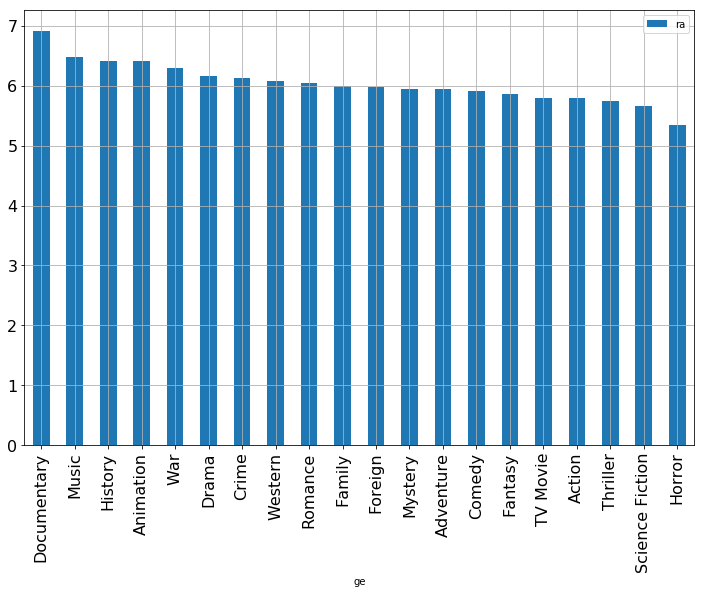

In [26]:
df_average.plot(kind='bar',figsize=(12,8),fontsize=16,grid=True);

Based on the bar chart above, the `Documentary`,`Music`,`History`,`Animation` and `War` movie have higher score, and `Horror`,`Science Fiction`, `Thriller`,`Action` and `TV Movie`movie has lower score.

--------------
## And the final conclusions listed below:
   
   ### 1. There is a positive correlation between `vote average` and `vote count`. This means a movie would get higher rating, if audience voted more for it.

   ### 2. There is a negative correlation between `vote average` and `release year`. This means in audience's mind, those *old fashion* movies are more welcome. Meanwhile *bad movies* are generated more since 1990.

   ### 3. Based on the data, `Documentary`, `Music` ,`History`, `Animation` and `War` the movies are most welcome. And `Horror`, `Science Fiction` (a little suprise), `Thriller`, `Action` and `TV Movie` movie get lower rating.